In [1]:
import numpy as np
import matplotlib.pyplot as plt

Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.

In [41]:

# Задаємо параметри прямої
kk = 3
bb = 8

# Генеруємо випадкові дані навколо прямої
num_points = 100
noise = np.random.normal(0, 1, num_points)  # Генеруємо шум
xx = np.random.uniform(0, 10, num_points)  # Генеруємо випадкові значення x
yy = kk * xx + bb + noise  # Розраховуємо відповідні значення y

# Перевірка перших 5 точок
print("Перші 5 точок:")
for i in range(5):
    print(f"Точка {i+1}: (x={xx[i]}, y={yy[i]})")


Перші 5 точок:
Точка 1: (x=6.837612207939666, y=30.194736668813597)
Точка 2: (x=1.447568933077874, y=15.09439282941041)
Точка 3: (x=9.02634755846552, y=34.68046127056891)
Точка 4: (x=9.639150106391366, y=36.65433931157345)
Точка 5: (x=3.3131057641959227, y=16.348584348136626)


Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок ^k та ^b.

In [42]:
def least_squares_estimate(xx, yy):
    # Обчислюємо кількість точок
    n = len(xx)
    
    # Обчислюємо суми для обчислення ^k та ^b
    sum_xx = np.sum(xx)
    sum_yy = np.sum(yy)
    sum_xy = np.sum(xx * yy)
    sum_xx_squared = np.sum(xx**2)
    
    # Знаходимо ^k та ^b за допомогою формул методу найменших квадратів
    k_hat = (n * sum_xy - sum_xx * sum_yy) / (n * sum_xx_squared - sum_xx**2)
    b_hat = (sum_yy - k_hat * sum_xx) / n
    
    return k_hat, b_hat

# Перевірка функції на випадкових даних
k_hat, b_hat = least_squares_estimate(xx, yy)
print("Оригінальні параметри прямої:")
print(f"k = {kk}")
print(f"b = {bb}\n")
print("Оптимальні оцінки ^k та ^b:")
print(f"^k = {k_hat}")
print(f"^b = {b_hat}")


Оригінальні параметри прямої:
k = 3
b = 8

Оптимальні оцінки ^k та ^b:
^k = 2.974437854897556
^b = 8.148289327908655


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [43]:
# Обчислюємо оцінку параметрів за допомогою np.polyfit(x, y, 1)
polyfit_k, polyfit_b = np.polyfit(xx, yy, 1)

# Виводимо результати порівняння
print("Порівняння знайдених параметрів:")
print(f"Оптимальна оцінка ^k: {k_hat}, Оцінка за np.polyfit: {polyfit_k}")
print(f"Оптимальна оцінка ^b: {b_hat}, Оцінка за np.polyfit: {polyfit_b}")

if kk is not None and bb is not None:
    print("\nПорівняння з початковими параметрами прямої:")
    print(f"Початкове k: {kk}, Оцінка за np.polyfit: {polyfit_k}")
    print(f"Початкове b: {bb}, Оцінка за np.polyfit: {polyfit_b}")


Порівняння знайдених параметрів:
Оптимальна оцінка ^k: 2.974437854897556, Оцінка за np.polyfit: 2.9744378548975563
Оптимальна оцінка ^b: 8.148289327908655, Оцінка за np.polyfit: 8.148289327908655

Порівняння з початковими параметрами прямої:
Початкове k: 3, Оцінка за np.polyfit: 2.9744378548975563
Початкове b: 8, Оцінка за np.polyfit: 8.148289327908655


Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

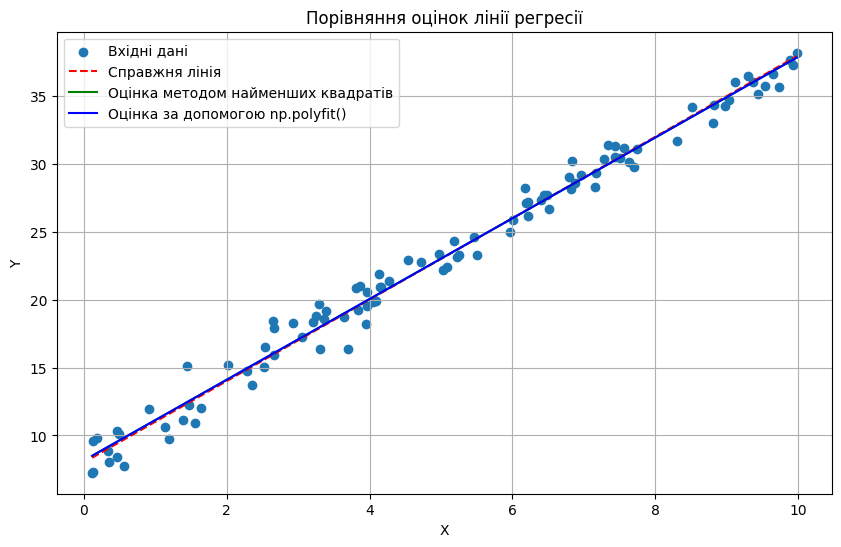

In [47]:

# Генерація точок для відображення згенерованої лінії
line_x = np.linspace(min(xx), max(xx), 100)
line_y_true = kk * line_x + bb
line_y_estimated = k_hat * line_x + b_hat
line_y_polyfit = polyfit_k * line_x + polyfit_b

# Відображення результатів на графіку
plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Вхідні дані')
plt.plot(line_x, line_y_true, color='red', linestyle='--', label='Справжня лінія')
plt.plot(line_x, line_y_estimated, color='green', label='Оцінка методом найменших квадратів')
plt.plot(line_x, line_y_polyfit, color='blue', label='Оцінка за допомогою np.polyfit()')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Порівняння оцінок лінії регресії')
plt.legend()
plt.grid(True)
plt.show()


Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок ^k та ^b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [45]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(xx, yy, learning_rate=0.01, n_iter=1000, tol=1e-6):
    # Ініціалізуємо початкові значення k та b
    k = 0
    b = 0
    n = len(xx)
    
    # Градієнтний спуск
    for _ in range(n_iter):
        # Обчислюємо прогнозовані значення y
        y_pred = k * xx + b
        
        # Обчислюємо похибку
        loss = mean_squared_error(yy, y_pred)
        
        # Перевірка на зупинку згідно з критерієм збіжності
        if loss < tol:
            break
        
        # Обчислюємо градієнти
        grad_k = -(2/n) * np.sum(xx * (yy - y_pred))
        grad_b = -(2/n) * np.sum(yy - y_pred)
        
        # Оновлюємо параметри
        k -= learning_rate * grad_k
        b -= learning_rate * grad_b
        
    return k, b

# Перевірка функції градієнтного спуску на випадкових даних
learning_rate = 0.01
n_iter = 1000
optimal_k, optimal_b = gradient_descent(xx, yy, learning_rate, n_iter)
print("Оптимальні оцінки ^k та ^b, отримані за допомогою градієнтного спуску:")
print(f"^k = {optimal_k}")
print(f"^b = {optimal_b}")


Оптимальні оцінки ^k та ^b, отримані за допомогою градієнтного спуску:
^k = 2.982886676340316
^b = 8.0930839477262


Додайте отриману лінію регресії на загальний графік

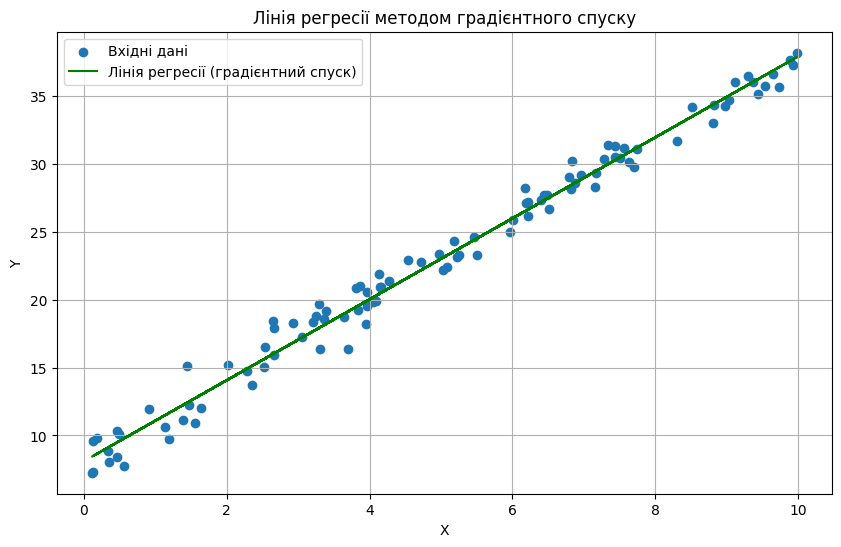

In [48]:
# Визначимо параметри градієнтного спуску
learning_rate = 0.01
n_iter = 1000

# Знайдемо оптимальні оцінки ^k та ^b за допомогою градієнтного спуску
optimal_k, optimal_b = gradient_descent(xx, yy, learning_rate, n_iter)

# Відобразимо результати на графіку
plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Вхідні дані')

# Відобразимо отриману лінію регресії
plt.plot(xx, optimal_k * xx + optimal_b, color='green', label='Лінія регресії (градієнтний спуск)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лінія регресії методом градієнтного спуску')
plt.legend()
plt.grid(True)
plt.show()


Побудуйте графік похибки від кількості ітерацій, зробіть висновки

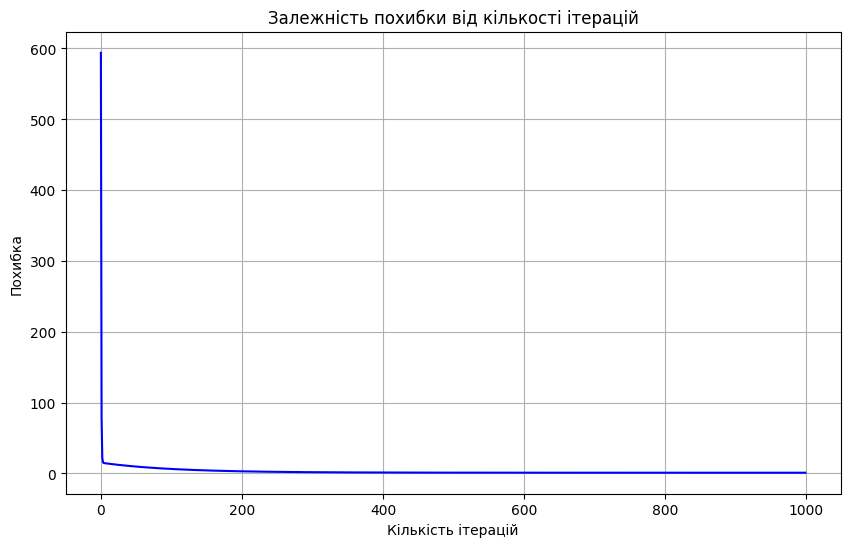

In [50]:
def gradient_descent_with_error(xx, yy, learning_rate=0.01, n_iter=1000, tol=1e-6):
    # Ініціалізуємо початкові значення k та b
    k = 0
    b = 0
    n = len(xx)
    
    # Створюємо список для збереження значень похибки на кожній ітерації
    errors = []
    
    # Градієнтний спуск
    for _ in range(n_iter):
        # Обчислюємо прогнозовані значення y
        y_pred = k * xx + b
        
        # Обчислюємо похибку
        loss = mean_squared_error(yy, y_pred)
        errors.append(loss)
        
        # Перевірка на зупинку згідно з критерієм збіжності
        if loss < tol:
            break
        
        # Обчислюємо градієнти
        grad_k = -(2/n) * np.sum(xx * (yy - y_pred))
        grad_b = -(2/n) * np.sum(yy - y_pred)
        
        # Оновлюємо параметри
        k -= learning_rate * grad_k
        b -= learning_rate * grad_b
        
    return errors

# Перевірка функції градієнтного спуску на випадкових даних
learning_rate = 0.01
n_iter = 1000
errors = gradient_descent_with_error(xx, yy, learning_rate, n_iter)

# Побудова графіка похибки від кількості ітерацій
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()


Порівняйте отримані результати з результатами попереднього завдання

In [53]:
# Оцінка за допомогою методу найменших квадратів
estimated_k = optimal_k
estimated_b = optimal_b

# Оцінка за допомогою np.polyfit()
estimated_k_polyfit = np.polyfit(xx, yy, 1)[0]
estimated_b_polyfit = np.polyfit(xx, yy, 1)[1]

# Виведення результатів поруч
print("Оптимальний нахил (градієнтний спуск):", optimal_k)
print("Оптимальне зміщення (градієнтний спуск):", optimal_b)
print("Оцінка нахилу (метод найменших квадратів):", estimated_k)
print("Оцінка зміщення (метод найменших квадратів):", estimated_b)
print("Оцінка нахилу (np.polyfit()):", estimated_k_polyfit)
print("Оцінка зміщення (np.polyfit()):", estimated_b_polyfit)


Оптимальний нахил (градієнтний спуск): 2.982886676340316
Оптимальне зміщення (градієнтний спуск): 8.0930839477262
Оцінка нахилу (метод найменших квадратів): 2.982886676340316
Оцінка зміщення (метод найменших квадратів): 8.0930839477262
Оцінка нахилу (np.polyfit()): 2.9744378548975563
Оцінка зміщення (np.polyfit()): 8.148289327908655
